## Example 1: Basic Optical Properties
This notebook will take you through basic usage of the wptherml package to compute optical properties of multi-layer stacks.

### Optical properties of 200 nm glass in air
The following lines will import the multilayer class and create an instance of the multilayer class called $glass$_$slab$,
which 
Several basic properties of $glass$_$slab$ will be defined by a dictionary called $structure$; additional keywords are defined in this dictionary, and are explained in comments.  To begin with, we will define a structure that consistes of a 200 nm thick piece of glass with air above and below.

In [2]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
import numpy as np


structure = {
        'Temperature': 300,
        ### actual materials the structure is made from
        ### values are stored in the attribute self.n
        'Material_List': ['Air', 'SiO2', 'Air'],
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d
        'Thickness_List': [0, 200e-9, 0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [400e-9, 800e-9, 1000]
        }

### create the instance called glass_slab
glass_slab = multilayer(structure)




Upon instantiation, the basic optical properties (reflectivity, transmissivity, absorptivity/emissivity) are computed using the method $self.Fresnel()$ and stored as attributes $self.Reflectivity$, $self.Transmissivity$, $self.Emissivity$.  We will plot them as a function 
of wavelength in nanometers using pyplot in the following lines.  Note that we store all quantities in SI units, so we will multiply all values of $self.lam$ by $10^9 nm/m$ to convert the wavelengths to nanometers.

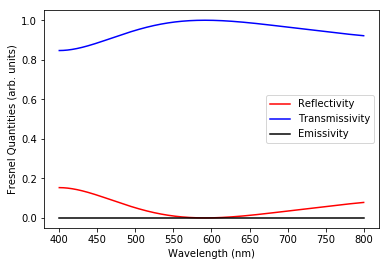

In [3]:
### Plot reflectivity with a red line
plt.plot(glass_slab.lambda_array*1e9, glass_slab.reflectivity_array, 'red', label='Reflectivity')
### Plot transmissivity with a blue line
plt.plot(glass_slab.lambda_array*1e9, glass_slab.transmissivity_array, 'blue', label='Transmissivity')
### Plot absorptivity/emissivity with a black line
plt.plot(glass_slab.lambda_array*1e9, glass_slab.emissivity_array, 'black', label='Emissivity')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Fresnel Quantities (arb. units)")
plt.legend()
plt.show()

We can also call a method called $AmbientColor$ to render the color of this structure.

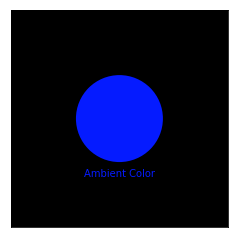

1

In [4]:
glass_slab.ambient_color()

### Optical properties of 50 nm glass in air
We can change the thickness of the glass slab by re-assigning the corresponding value of the $self.d$ attribute

In [5]:
glass_slab.d[1] = 50e-9

To update the reflectivity, transmissivity, and emissivity, we need to call the $self.Fresnel()$ method.

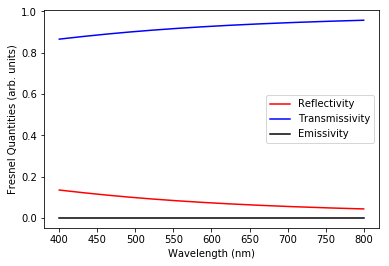

In [12]:
glass_slab.fresnel()

### Plot reflectivity with a red line
plt.plot(glass_slab.lambda_array*1e9, glass_slab.reflectivity_array, 'red', label = 'Reflectivity')
### Plot transmissivity with a blue line
plt.plot(glass_slab.lambda_array*1e9, glass_slab.transmissivity_array, 'blue', label = 'Transmissivity')
### Plot absorptivity/emissivity with a black line
plt.plot(glass_slab.lambda_array*1e9, glass_slab.emissivity_array, 'black', label = 'Emissivity')
plt.xlabel('Wavelength (nm)')
plt.ylabel("Fresnel Quantities (arb. units)")
plt.legend()
plt.show()


The color of the 50 nm glass slab can be re-computed and plotted as well:

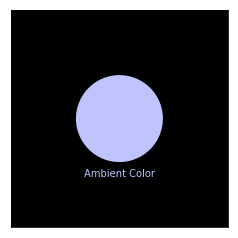

1

In [7]:
glass_slab.ambient_color()

We can also look at the optical properties as a function of angle at a fixed wavelength using the method $self.angular_fresnel(lambda0)$, where $lambda0$ is the wavelength of interest in meters.  

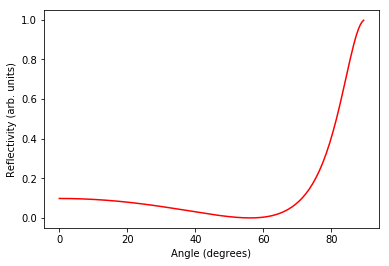

In [9]:
### method to compute reflectivity, transmissivity, and absorptivity vs angle at a specified
### wavelength... results are stored in the attributes
### self.r_vs_theta, self.t_vs_theta, and self.eps_vs_theta... array of angles is self.theta_array
###import numpy as np
glass_slab.angular_fresnel(500e-9)
plt.plot(180/np.pi*glass_slab.theta_array, glass_slab.r_vs_theta, 'red')
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectivity (arb. units)")
plt.show()

### Optical properties of a gold film on a glass substrate
Let's create a new instance of the  50 nm layer of gold deposite on glass with air above.
Unlike the glass film, this structure will exhibit absorption.


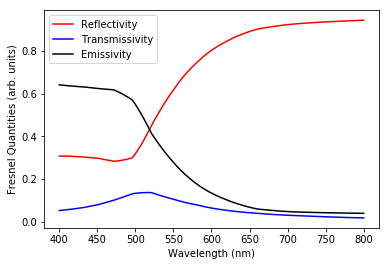

In [14]:
structure["Material_List"] = ['SiO2', 'Au', 'Air']
structure["Thickness_List"] = [0, 50e-9, 0]

gold_glass = multilayer(structure)


### Plot reflectivity with a red line
plt.plot(gold_glass.lambda_array*1e9, gold_glass.reflectivity_array, 'red', label = 'Reflectivity')
### Plot transmissivity with a blue line
plt.plot(gold_glass.lambda_array*1e9, gold_glass.transmissivity_array, 'blue',label ='Transmissivity')
### Plot absorptivity/emissivity with a black line
plt.plot(gold_glass.lambda_array*1e9, gold_glass.emissivity_array, 'black',label ='Emissivity')
plt.xlabel("Wavelength (nm)")
plt.ylabel('Fresnel Quantities (arb. units)')
plt.legend()
plt.show()

If we again look at the angular dependence of the reflection, we can see the
characteristic reflection dip associated with Kretschmann-Raether excitation of surface waves.

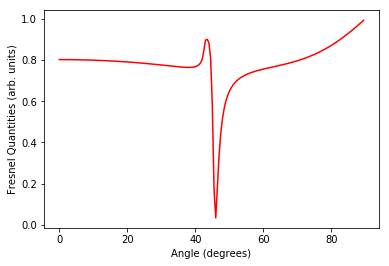

In [15]:
gold_glass.angular_fresnel(600e-9)
plt.plot(180/np.pi*gold_glass.theta_array, gold_glass.r_vs_theta, 'red')
plt.xlabel('Angle (degrees)')
plt.ylabel("Reflectivity (arb. units)")
plt.show()

We can also look render the color of the gold structure as before.

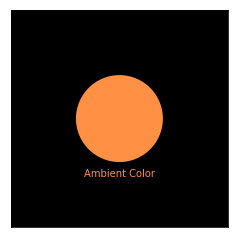

1

In [10]:
gold_glass.ambient_color()

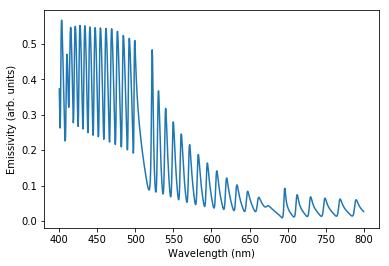

In [16]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
import numpy as np
d1 = 500e-9/(2*1.45)
d2 = 500e-9/(2*1.9)
structure = {
        'Temperature': 300,
        ### actual materials the structure is made from
        ### values are stored in the attribute self.n
        'Material_List': ['Air', 'Au', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN','Air'],
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d
        'Thickness_List': [0, 30e-9, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2,0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [400e-9, 800e-9, 1000]
        }

t = multilayer(structure)
t.layer_static_ri(2, 3.7)
t.layer_static_ri(3, 3.0)
t.layer_static_ri(4, 3.7)
t.layer_static_ri(5, 3.0)
t.layer_static_ri(6, 3.7)
t.layer_static_ri(7, 3.0)
t.layer_static_ri(8, 3.7)
t.layer_static_ri(9, 3.0)
t.layer_static_ri(10, 3.7)
t.layer_static_ri(11, 3.0)
t.layer_static_ri(12, 3.7)
t.layer_static_ri(13, 3.0)
t.layer_static_ri(14, 3.7)
t.layer_static_ri(15, 3.0)
t.layer_static_ri(16, 3.7)
t.layer_static_ri(17, 3.0)
t.layer_static_ri(18, 3.7)
t.layer_static_ri(19, 3.0)
t.layer_static_ri(20, 3.7)
t.layer_static_ri(21, 3.0)
t.layer_static_ri(22, 3.7)
t.layer_static_ri(23, 3.0)
t.layer_static_ri(24, 3.7)
t.layer_static_ri(25, 3.0)
t.layer_static_ri(26, 3.7)
t.layer_static_ri(27, 3.0)
t.layer_static_ri(28, 3.7)
t.layer_static_ri(29, 3.0)
t.theta = 30*np.pi/180
t.fresnel()


plt.plot(t.lambda_array*1e9, t.emissivity_array)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Emissivity (arb. units)')
plt.show()

